In [64]:
# imports
from tensorflow.keras.applications import vgg16,vgg19,DenseNet201
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.models import Model
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import cv2
import numpy as np
import pickle
import json
from tqdm import tqdm

In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
import tensorflow as tf
import keras
print(keras.__version__)
print(tf.__version__)

2.5.0
2.5.0


In [78]:
def path_set(ad_acc):
  imgs_path = "/content/drive/MyDrive/BLKBOX/BLKBOX_CREATIVES/{a}/".format(a=ad_acc)
  target_path = "/content/drive/MyDrive/BLKBOX/test/"
  return imgs_path,target_path

In [79]:
ad_acc = 'act_125428025564921'
imgs_path,target_path = path_set(ad_acc)
imgs_path

'/content/drive/MyDrive/BLKBOX/BLKBOX_CREATIVES/act_125428025564921/'

In [80]:
# parameters setup
imgs_model_width, imgs_model_height = 224, 224
nb_closest_images = 5 # number of most similar images to retrieve

In [81]:
# load the model
dense_model = DenseNet201(weights='imagenet')

# remove the last layers in order to get features instead of predictions
feat_extractor = Model(inputs=dense_model.input, outputs=dense_model.get_layer("avg_pool").output)

# print the layers of the CNN
feat_extractor.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_6 (ZeroPadding2D (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_6[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
____________________________________________________________________________________________

In [82]:
files = [imgs_path + x for x in os.listdir(imgs_path) if ".png" in x]
#files = np.random.choice(files, 4000)
files = list(set(files))
print("number of images:",len(files))

number of images: 369


In [83]:
files1 = [target_path + x for x in os.listdir(target_path) if "png" in x]
#files1 = np.random.choice(files1, 3)
print("number of images:",len(files1))
files1 = list(files_test)

number of images: 54


In [84]:
def feat_extract(files):    
    # load all the images and prepare them for feeding into the CNN
    files2 = []
    counter = 0
    importedImages = []

    for f in tqdm(files, desc ="Converting train images to arrays for nn"):
        filename = f
        try:
          original = load_img(filename,target_size=(imgs_model_width, imgs_model_height))
          files2.append(filename)
          numpy_image = img_to_array(original)
          image_batch = np.expand_dims(numpy_image, axis=0)
          importedImages.append(image_batch)
          counter += 1
      #   print(counter)
          pass
        except:
          continue  
    images = np.vstack(importedImages)

    processed_imgs = preprocess_input(images.copy())

    # extract the images features
    print("features successfully Started")
    imgs_features = feat_extractor.predict(processed_imgs)

    print("features successfully extracted!")
    imgs_features.shape
    return imgs_features,files2
  


In [85]:
imgs_features_train,files_train = feat_extract(files)
imgs_features_test,files_test = feat_extract(files1)

Converting train images to arrays for nn: 100%|██████████| 369/369 [00:08<00:00, 46.09it/s]


features successfully Started


Converting train images to arrays for nn:   7%|▋         | 4/54 [00:00<00:01, 37.85it/s]

features successfully extracted!


Converting train images to arrays for nn: 100%|██████████| 54/54 [00:01<00:00, 51.40it/s]


features successfully Started
features successfully extracted!


In [86]:
print(imgs_features_train.shape)
print(len(files_train))
print(imgs_features_test.shape)
print(len(files_test))

(369, 1920)
369
(54, 1920)
54


In [87]:
np.save("/content/drive/MyDrive/BLKBOX/training_data_storage/{a}".format(a = ad_acc), imgs_features_train)

In [88]:
img_features = np.load("/content/drive/MyDrive/BLKBOX/training_data_storage/{a}.npy".format(a = ad_acc))

In [89]:
with open("/content/drive/MyDrive/BLKBOX/training_data_storage/{a}.txt".format(a = ad_acc),"wb") as fp:
  pickle.dump(files_train, fp)

In [90]:
with open("/content/drive/MyDrive/BLKBOX/training_data_storage/{a}.txt".format(a = ad_acc),"rb") as fp:
  files_train = pickle.load(fp)

In [91]:
arr = np.concatenate((imgs_features_train, imgs_features_test), axis=0)
arr.shape

(423, 1920)

In [92]:
files_all = files_train + files_test
files_all

['/content/drive/MyDrive/BLKBOX/BLKBOX_CREATIVES/act_125428025564921/act_125428025564921-23845599190800149:140.png',
 '/content/drive/MyDrive/BLKBOX/BLKBOX_CREATIVES/act_125428025564921/act_125428025564921-23845514771540149:317.png',
 '/content/drive/MyDrive/BLKBOX/BLKBOX_CREATIVES/act_125428025564921/act_125428025564921-23845591091310149:233.png',
 '/content/drive/MyDrive/BLKBOX/BLKBOX_CREATIVES/act_125428025564921/act_125428025564921-23845591088360149:192.png',
 '/content/drive/MyDrive/BLKBOX/BLKBOX_CREATIVES/act_125428025564921/act_125428025564921-23845590975340149:259.png',
 '/content/drive/MyDrive/BLKBOX/BLKBOX_CREATIVES/act_125428025564921/act_125428025564921-23847970870710149:28.png',
 '/content/drive/MyDrive/BLKBOX/BLKBOX_CREATIVES/act_125428025564921/act_125428025564921-23846259360670149:84.png',
 '/content/drive/MyDrive/BLKBOX/BLKBOX_CREATIVES/act_125428025564921/act_125428025564921-23845591117460149:224.png',
 '/content/drive/MyDrive/BLKBOX/BLKBOX_CREATIVES/act_1254280255649

In [93]:
len(files_all)

423

In [94]:
# compute cosine similarities between images

cosSimilarities = cosine_similarity(arr)

# store the results into a pandas dataframe

cos_similarities_df = pd.DataFrame(cosSimilarities, columns=files_all, index=files_all)
cos_similarities_df.head()

,/content/drive/MyDrive/BLKBOX/BLKBOX_CREATIVES/act_125428025564921/act_125428025564921-23845599190800149:140.png,/content/drive/MyDrive/BLKBOX/BLKBOX_CREATIVES/act_125428025564921/act_125428025564921-23845514771540149:317.png,/content/drive/MyDrive/BLKBOX/BLKBOX_CREATIVES/act_125428025564921/act_125428025564921-23845591091310149:233.png,/content/drive/MyDrive/BLKBOX/BLKBOX_CREATIVES/act_125428025564921/act_125428025564921-23845591088360149:192.png,/content/drive/MyDrive/BLKBOX/BLKBOX_CREATIVES/act_125428025564921/act_125428025564921-23845590975340149:259.png,/content/drive/MyDrive/BLKBOX/BLKBOX_CREATIVES/act_125428025564921/act_125428025564921-23847970870710149:28.png,/content/drive/MyDrive/BLKBOX/BLKBOX_CREATIVES/act_125428025564921/act_125428025564921-23846259360670149:84.png,/content/drive/MyDrive/BLKBOX/BLKBOX_CREATIVES/act_125428025564921/act_125428025564921-23845591117460149:224.png,/content/drive/MyDrive/BLKBOX/BLKBOX_CREATIVES/act_125428025564921/act_125428025564921-23845599172120149:184.png,/content/drive/MyDrive/BLKBOX/BLKBOX_CREATIVES/act_125428025564921/act_125428025564921-23845590963400149:272.png,/content/drive/MyDrive/BLKBOX/BLKBOX_CREATIVES/act_125428025564921/act_125428025564921-23845599210870149:77.png,/content/drive/MyDrive/BLKBOX/BLKBOX_CREATIVES/act_125428025564921/act_125428025564921-23845828781510149:106.png,/content/drive/MyDrive/BLKBOX/BLKBOX_CREATIVES/act_125428025564921/act_125428025564921-23844875219240149:352.png,/content/drive/MyDrive/BLKBOX/BLKBOX_CREATIVES/act_125428025564921/act_125428025564921-23845590960770149:273.png,/content/drive/MyDrive/BLKBOX/BLKBOX_CREATIVES/act_125428025564921/act_125428025564921-23845590989820149:246.png,/content/drive/MyDrive/BLKBOX/BLKBOX_CREATIVES/act_125428025564921/act_125428025564921-23846463929510149:79.png,/content/drive/MyDrive/BLKBOX/BLKBOX_CREATIVES/act_125428025564921/act_125428025564921-23845591099540149:191.png,/content/drive/MyDrive/BLKBOX/BLKBOX_CREATIVES/act_125428025564921/act_125428025564921-23847208309040149:66.png,/content/drive/MyDrive/BLKBOX/BLKBOX_CREATIVES/act_125428025564921/act_125428025564921-23845590949180149:265.png,/content/drive/MyDrive/BLKBOX/BLKBOX_CREATIVES/act_125428025564921/act_125428025564921-23845599129250149:202.png,/content/drive/MyDrive/BLKBOX/BLKBOX_CREATIVES/act_125428025564921/act_125428025564921-23845599168920149:198.png,/content/drive/MyDrive/BLKBOX/BLKBOX_CREATIVES/act_125428025564921/act_125428025564921-23844818645950149:365.png,/content/drive/MyDrive/BLKBOX/BLKBOX_CREATIVES/act_125428025564921/act_125428025564921-23845591090720149:220.png,/content/drive/MyDrive/BLKBOX/BLKBOX_CREATIVES/act_125428025564921/act_125428025564921-140243100760477:22.png,/content/drive/MyDrive/BLKBOX/BLKBOX_CREATIVES/act_125428025564921/act_125428025564921-23845599220170149:126.png,/content/drive/MyDrive/BLKBOX/BLKBOX_CREATIVES/act_125428025564921/act_125428025564921-23845070437760149:311.png,/content/drive/MyDrive/BLKBOX/BLKBOX_CREATIVES/act_125428025564921/act_125428025564921-23845591086340149:193.png,/content/drive/MyDrive/BLKBOX/BLKBOX_CREATIVES/act_125428025564921/act_125428025564921-23845590955370149:269.png,/content/drive/MyDrive/BLKBOX/BLKBOX_CREATIVES/act_125428025564921/act_125428025564921-23845599123140149:204.png,/content/drive/MyDrive/BLKBOX/BLKBOX_CREATIVES/act_125428025564921/act_125428025564921-23845750772510149:122.png,/content/drive/MyDrive/BLKBOX/BLKBOX_CREATIVES/act_125428025564921/act_125428025564921-23845591119800149:200.png,/content/drive/MyDrive/BLKBOX/BLKBOX_CREATIVES/act_125428025564921/act_125428025564921-23845590941470149:292.png,/content/drive/MyDrive/BLKBOX/BLKBOX_CREATIVES/act_125428025564921/act_125428025564921-621743725339193:14.png,/content/drive/MyDrive/BLKBOX/BLKBOX_CREATIVES/act_125428025564921/act_125428025564921-23845599208360149:145.png,/content/drive/MyDrive/BLKBOX/BLKBOX_CREATIVES/act_125428025564921/act_125428025564921-23844818646070149:367.png,/content/drive/MyDrive/BLKBOX/BLKBOX_CREATIVES/act_1254

In [95]:
# function to retrieve the most similar products for a given one

def retrieve_most_similar_adds(given_img):

    print("*********************************")
    print("Original Add Image:")
    print("*********************************")
    print(given_img)
    original = load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
    plt.imshow(original)
    plt.show()

    print("-----------------------------------------------------------------------")
    print("Most Similar Add Image Recommended:")

    closest_imgs = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1].index
    closest_imgs_scores = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1]

    for i in range(0,len(closest_imgs)):
        original = load_img(closest_imgs[i], target_size=(imgs_model_width, imgs_model_height))
        print(closest_imgs[i])
        plt.imshow(original)
        plt.show()
        print("Cosine Similarity Score: ",closest_imgs_scores[i])
        print('---------------------------------------------------------------------')

*********************************
Original Add Image:
*********************************
/content/drive/MyDrive/BLKBOX/BLKBOX_CREATIVES/act_125428025564921/act_125428025564921-23845599089550149:208.png


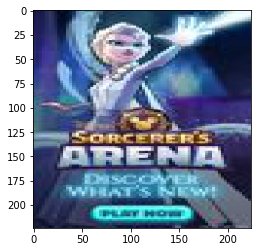

-----------------------------------------------------------------------
Most Similar Add Image Recommended:
/content/drive/MyDrive/BLKBOX/BLKBOX_CREATIVES/act_125428025564921/act_125428025564921-23845599091740149:207.png


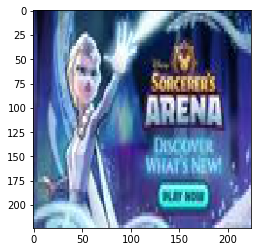

Cosine Similarity Score:  0.9440705
---------------------------------------------------------------------
/content/drive/MyDrive/BLKBOX/BLKBOX_CREATIVES/act_125428025564921/act_125428025564921-23845599129250149:202.png


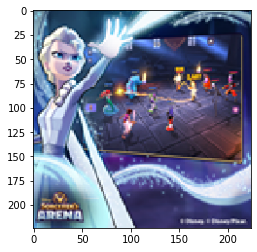

Cosine Similarity Score:  0.8949648
---------------------------------------------------------------------
/content/drive/MyDrive/BLKBOX/BLKBOX_CREATIVES/act_125428025564921/act_125428025564921-23845599127440149:203.png


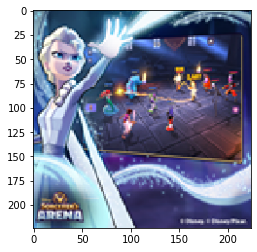

Cosine Similarity Score:  0.8949648
---------------------------------------------------------------------
/content/drive/MyDrive/BLKBOX/BLKBOX_CREATIVES/act_125428025564921/act_125428025564921-23845599091990149:206.png


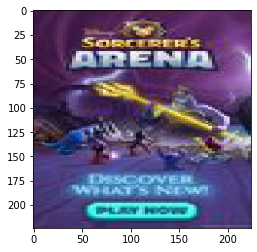

Cosine Similarity Score:  0.8824134
---------------------------------------------------------------------
/content/drive/MyDrive/BLKBOX/BLKBOX_CREATIVES/act_125428025564921/act_125428025564921-23845591104590149:228.png


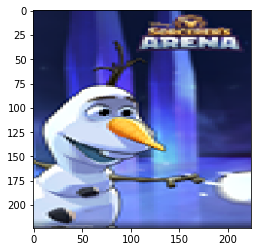

Cosine Similarity Score:  0.8808751
---------------------------------------------------------------------


In [96]:
retrieve_most_similar_adds(files3[len(files_all)-1])